# Comment utiliser la bibliothèques EIM

## import

### installation de la librairie ( à faire que si la librairie n'est pas déja installé)

In [ ]:
!git https://github.com/samsja/eim.git

In [ ]:
!pip install src/packages/dist/eim_samsja_faycal-0.0.1-py3-none-any.wh

### autre import

In [1]:
from eim import Eim

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## initilisation de la classes

EIM est un algorithme de réduction de dimensionalité applicable à des jeux de données

on commence par géneré un jeu de données pour l'exemple

In [3]:
def f(x,mu):
    return np.array([np.cos(mu*x),np.sin(x/mu),np.exp(x/mu)]).T
N=200
x_values = np.linspace(1,10,num=N)
Nmu=300
M = np.linspace(1,10,Nmu)

Z = np.zeros((M.shape[0],x_values.shape[0],3))

for i in range(M.shape[0]):
    Z[i] = np.array(f(x_values,M[i]))

In [4]:
Z.shape

(300, 200, 3)

Pour utiliser eim il faut un jeu de données de taille (M,N,D) oû:

* M est le nombre d'entrée, en reprenant les termes théroqiues M est la dimension de l'espace des paramètres : $\mu$ dans $f(\cdot,\mu)$

* N est le nombre de points dans le cadre desfonctions oû le nombre de colones d'un dataframe

* D est la dimension de l'espace d'arrivée des fonctions, pour un dataframe cette valeur est géneralement 1

In [5]:
ev = Eim(Z,from_numpy=True)

Il faut garder en tête que notre algorithme à été codé (dans la version optim) avec Pytorch comme backend, et que donc les entité que l'on manipule ne sont pas des Ndarray de numpy mais des Tensors de Torch. Heuresement les deux structures communent très bien et il est facile de passer d'une à l'autre (sans duplication des données en mémoire)

la méthode suivante est donc équivalente à la précédente

In [6]:
Z_torch = torch.from_numpy(Z)
ev = Eim(Z_torch)

On peut aussi passer une matrice (N,M) à eim, il castera automatiquement vers un tenseur (N,M,1)

In [7]:
Z2 = np.zeros((4,5))
ev2 = Eim(Z2,from_numpy=True)
ev2.Z.shape

torch.Size([4, 5, 1])

## Entrainement de l'algo

La méthode principale pour entrainer l'algo est : reach_precision()

0.399786588871326 error in 0.003649473190307617 s :  18%|█▊        | 35/200 [00:00<00:00, 250.73it/s]   


 we have a 35-kolmogorov-width with a final error of 0.06469335928079545, dimensionality reduction : 0.8833333333333333  


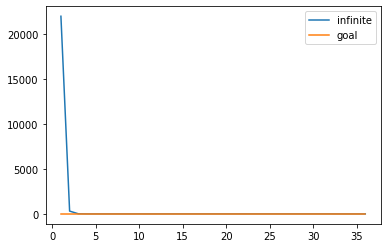

In [8]:
ev.reach_precision(epsilon=1e-1)

Vous pouvez aussi appelé cette méthode en précisant le nombre d'itération max

In [9]:
ev.reach_precision(epsilon=1e-1,nb_iter=2,plot=False)

22026.465794806718 error in 0.0013828277587890625 s :  50%|█████     | 1/2 [00:00<00:00, 251.91it/s]  

 we have a 1-kolmogorov-width with a final error of 314.3121149695935, dimensionality reduction : 0.9966666666666667  


on peut ensuite faire de nouvelle étape sans repartir à Zéro avec le paramètre reset à faux

In [10]:
ev.reach_precision(epsilon=1e-1,nb_iter=2,plot=False,reset=False)

15.374218480568075 error in 0.003846406936645508 s :  50%|█████     | 1/2 [00:00<00:00, 273.80it/s]  

 we have a 1-kolmogorov-width with a final error of 1.905004803126212, dimensionality reduction : 0.9966666666666667  


Pour accéder à la documentation utiliser la commande ipython suivante 

In [11]:
ev.reach_precision?

## Uitliser les coefficients de projection

Vous pouvez génerer les alphas pour n'importe quel autre donées, c'est à dire projeter des nouvelles de données dans l'espace reduit eim

In [12]:
alphas = ev.compute_alpha(ev.m,ev.Z)

On notera qu'il y a grand intéret à utiliser un m plus petit que self.m, en effet on peut vouloir calculer les bases de eim pour un précision donner, et observer qu'il ya un palier juste avant de descendre en dessous de la précision souhaité, alors on pourra choisir une précision un tout petit plus petite mais avoir une base eim beaucoup plus petite

vous pouvez utiliser ces coefficients alphas (ou d'autre) pour calculer la projection de le m-base géneré par eim

In [13]:
ev.project_with_alpha(alphas).shape

torch.Size([300, 200, 3])

## Sauver et charger un modèle

Vous pouvez biensure sauver et charger un modèle

In [14]:
ev.save_model("../data/model/test.model")

on peut ensuite charger le model dans un nouveau object de la classe eim_vectorial_optim ( ou dans le même mais c'est rarement utile)

In [15]:
ev_load = Eim(None,load=True)

In [16]:
ev_load.load_model("../data/model/test.model")

on peut vérifier que ev et ev_load on les mêmes paramètres

In [17]:
(ev_load.Q_tab == ev.Q_tab).all() ,(ev_load.x_magics == ev.x_magics).all(),(ev_load.j_magics == ev.j_magics).all(),(ev_load.x_magics == ev.x_magics).all(),(ev_load.mu_magics == ev.mu_magics).all()

(tensor(True, device='cuda:0'),
 tensor(True),
 tensor(True),
 tensor(True),
 tensor(True))